In [1]:
import sys
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
sys.path.append('..')
warnings.filterwarnings("ignore")

In [3]:
from realseries.models.vae_dense import VAE_Dense
import matplotlib.pyplot as plt

In [4]:
window_size = 50
channels = 6 * 12
h_dim = 200
z_dim = 20
data_split_rate = 0.5
epochs = 250
lr = 1e-3
lr_decay = 0.75 # decay every 10 epoch, 0.8 for Yahoo!, 0.75 for KPIs
lamb = 10 # 10 for Yahoo!, 1 for KPIs
clip_norm_value = 12.0 # 12.0, 10.0
bs = 64
weight_decay=1e-3

### Data Prepare

In [5]:
multidim_series = np.load('../examples/data/intel_lab_data/data-0301-0310.npy')
multidim_series.shape

(1351, 6, 12)

In [6]:
multidim_series = multidim_series.reshape(multidim_series.shape[0], -1)
multidim_series.shape

(1351, 72)

In [7]:
split_pos = int(len(multidim_series) * data_split_rate)
train_data, test_data = multidim_series[:split_pos], multidim_series[split_pos:]
print(train_data.shape, test_data.shape)

(675, 72) (676, 72)


In [8]:
loc_dict = np.load('../examples/data/intel_lab_data/loc_dict.npy', allow_pickle=True).item()
loc_dict.values()

dict_values([(0, 0), (0, 1), (0, 3), (0, 4), (0, 5), (0, 7), (0, 8), (0, 10), (0, 11), (1, 0), (1, 2), (1, 3), (1, 5), (1, 6), (1, 8), (1, 9), (1, 10), (1, 11), (2, 0), (2, 1), (2, 4), (2, 5), (2, 6), (2, 10), (2, 11), (3, 0), (3, 1), (3, 4), (3, 6), (3, 10), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 8), (4, 9), (4, 10), (4, 11), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11)])

In [16]:
sensor_loc = [item[0] * 12 + item[1] for item in loc_dict.values()]
print(sensor_loc)

[0, 1, 3, 4, 5, 7, 8, 10, 11, 12, 14, 15, 17, 18, 20, 21, 22, 23, 24, 25, 28, 29, 30, 34, 35, 36, 37, 40, 42, 46, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71]


### Model Define

In [9]:
vae = VAE_Dense(window_size,
                channels,
                name='VAE-Dense',
                num_epochs=epochs,
                batch_size=bs,
                lr=lr,
                lr_decay=lr_decay,
                clip_norm_value=clip_norm_value,
                weight_decay=weight_decay,
                h_dim=h_dim,
                z_dim=z_dim)

In [10]:
vae.fit(train_data)

Epoch[1/250] Loss: 10802.28808594 MSE: 10799.19042969 KLD: 3.09747553
Epoch[2/250] Loss: 8318.23242188 MSE: 8111.40966797 KLD: 206.82302856
Epoch[3/250] Loss: 5812.64746094 MSE: 5634.69677734 KLD: 177.95083618
Epoch[4/250] Loss: 4740.81396484 MSE: 4643.14550781 KLD: 97.66829681
Epoch[5/250] Loss: 4634.51806641 MSE: 4579.29296875 KLD: 55.22528839
Epoch[6/250] Loss: 4634.19042969 MSE: 4576.43212891 KLD: 57.75862122
Epoch[7/250] Loss: 4550.23388672 MSE: 4493.83007812 KLD: 56.40380096
Epoch[8/250] Loss: 4476.47558594 MSE: 4423.36816406 KLD: 53.10728836
Epoch[9/250] Loss: 4494.02343750 MSE: 4442.31884766 KLD: 51.70463562
Epoch[10/250] Loss: 4435.21484375 MSE: 4383.19873047 KLD: 52.01610947
Epoch[11/250] Loss: 4416.57910156 MSE: 4361.35595703 KLD: 55.22308731
Epoch[12/250] Loss: 4290.82666016 MSE: 4239.52685547 KLD: 51.29945374
Epoch[13/250] Loss: 4304.88623047 MSE: 4243.41699219 KLD: 61.46932983
Epoch[14/250] Loss: 4217.37451172 MSE: 4156.27001953 KLD: 61.10436249
Epoch[15/250] Loss: 4222.0

Epoch[117/250] Loss: 3930.52319336 MSE: 3861.16015625 KLD: 69.36318970
Epoch[118/250] Loss: 3936.36743164 MSE: 3867.87768555 KLD: 68.48934937
Epoch[119/250] Loss: 3914.62792969 MSE: 3847.98974609 KLD: 66.63819885
Epoch[120/250] Loss: 3952.82275391 MSE: 3883.21801758 KLD: 69.60477448
Epoch[121/250] Loss: 3957.73706055 MSE: 3888.58203125 KLD: 69.15515900
Epoch[122/250] Loss: 3940.01757812 MSE: 3870.74096680 KLD: 69.27665710
Epoch[123/250] Loss: 3926.45068359 MSE: 3854.24121094 KLD: 72.20934296
Epoch[124/250] Loss: 3942.56933594 MSE: 3871.10449219 KLD: 71.46480560
Epoch[125/250] Loss: 3932.92358398 MSE: 3862.56005859 KLD: 70.36327362
Epoch[126/250] Loss: 3921.75219727 MSE: 3851.23974609 KLD: 70.51234436
Epoch[127/250] Loss: 3914.47583008 MSE: 3849.40087891 KLD: 65.07466125
Epoch[128/250] Loss: 3930.06127930 MSE: 3861.22924805 KLD: 68.83203888
Epoch[129/250] Loss: 3956.97851562 MSE: 3886.73876953 KLD: 70.24004364
Epoch[130/250] Loss: 3931.81738281 MSE: 3864.32128906 KLD: 67.49618530
Epoch[

Epoch[232/250] Loss: 3932.97167969 MSE: 3862.21630859 KLD: 70.75519562
Epoch[233/250] Loss: 3927.16967773 MSE: 3851.81469727 KLD: 75.35511017
Epoch[234/250] Loss: 3942.77783203 MSE: 3876.41308594 KLD: 66.36477661
Epoch[235/250] Loss: 3941.65917969 MSE: 3869.25268555 KLD: 72.40662384
Epoch[236/250] Loss: 3953.06640625 MSE: 3881.18212891 KLD: 71.88404846
Epoch[237/250] Loss: 3957.72412109 MSE: 3883.61547852 KLD: 74.10878754
Epoch[238/250] Loss: 3942.64331055 MSE: 3874.64282227 KLD: 68.00057983
Epoch[239/250] Loss: 3929.01733398 MSE: 3858.49145508 KLD: 70.52603149
Epoch[240/250] Loss: 3964.44018555 MSE: 3889.24951172 KLD: 75.19070435
Epoch[241/250] Loss: 3914.13085938 MSE: 3844.79418945 KLD: 69.33672333
Epoch[242/250] Loss: 3948.09008789 MSE: 3874.86425781 KLD: 73.22565460
Epoch[243/250] Loss: 3930.30664062 MSE: 3860.38623047 KLD: 69.92083740
Epoch[244/250] Loss: 3956.96850586 MSE: 3887.70581055 KLD: 69.26269531
Epoch[245/250] Loss: 3949.90869141 MSE: 3878.37426758 KLD: 71.53438568
Epoch[

In [19]:
res = vae.detect(np.vstack([train_data, test_data]))

In [20]:
print(res['origin'].shape, res['recon'].shape, res['score'].shape)

(1302, 72) (1302, 72) (1302, 72)


In [21]:
check_list = [sensor_loc[i] for i in np.random.randint(0, len(sensor_loc) - 1, size=5)]
check_list

[15, 42, 0, 66, 36]

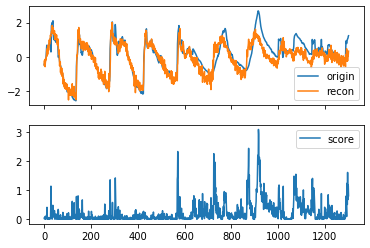

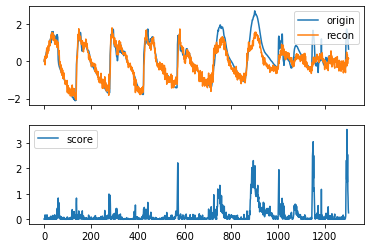

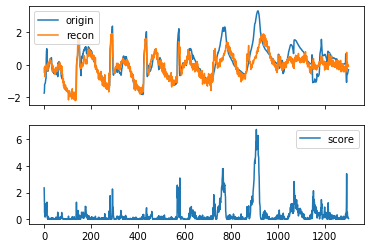

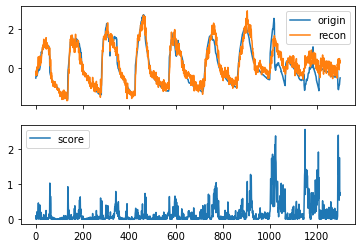

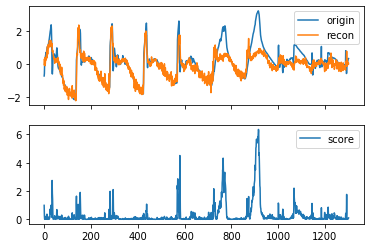

In [22]:
for item in check_list:
    fig, axes = plt.subplots(2, 1, sharex=True)
    axes[0].plot(res['origin'][:, item], label='origin')
    axes[0].plot(res['recon'][:, item], label='recon')
    axes[1].plot(res['score'][:, item], label='score')
    
    for k in range(2):
        axes[k].legend()
    
    plt.show()
    plt.close()

### Save and Load

In [23]:
vae.save('intellab.pt')

In [24]:
vae2 = VAE_Dense(window_size,
                channels,
                name='VAE-Dense',
                num_epochs=epochs,
                batch_size=bs,
                lr=lr,
                lr_decay=lr_decay,
                clip_norm_value=clip_norm_value,
                weight_decay=weight_decay,
                h_dim=h_dim,
                z_dim=z_dim)

In [25]:
vae2.load('intellab.pt')

In [26]:
res = vae2.detect(np.vstack([train_data, test_data]))

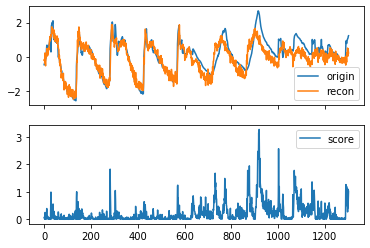

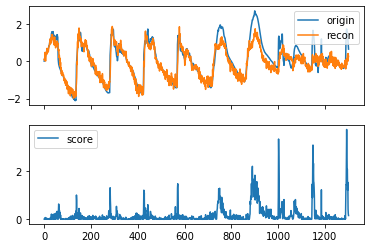

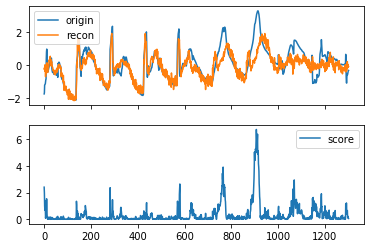

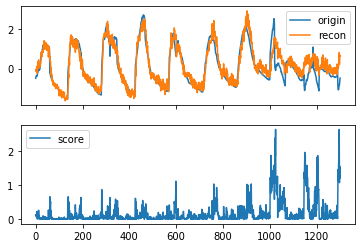

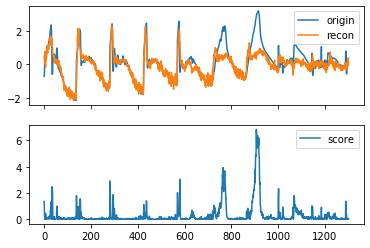

In [27]:
for item in check_list:
    fig, axes = plt.subplots(2, 1, sharex=True)
    axes[0].plot(res['origin'][:, item], label='origin')
    axes[0].plot(res['recon'][:, item], label='recon')
    axes[1].plot(res['score'][:, item], label='score')
    
    for k in range(2):
        axes[k].legend()
    
    plt.show()
    plt.close()